In [89]:
import qiskit
from qiskit import Aer, execute
import os
token = os.environ.get('ionq_token')
from qiskit_ionq_provider import IonQProvider 
from qiskit.quantum_info import entropy, DensityMatrix, partial_trace
from qiskit.visualization import plot_state_city, plot_histogram
from entropy import entanglement_entropy as ee 

In [101]:
provider = IonQProvider(token=token)

In [152]:
from qiskit import QuantumCircuit
# Create a bell state circuit.
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cnot(0,1)
qc.cnot(0,2)
# Show the circuit:
# qc.measure([0,1,2], [0,1,2])
qc.draw()

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘
c: 3/═══════════════

In [153]:
state_sim = Aer.get_backend('statevector_simulator')
sim = execute(qc, state_sim, shots=1000)
state_sim_result = sim.result()

In [155]:
state_vec = state_sim_result.get_statevector()
# entropy(state_vec)
entropy(partial_trace(state_vec, [0,1]))

0.9999999999999999

In [149]:
counts_sim = Aer.get_backend("qasm_simulator")
count_sim = execute(qc, counts_sim, shots=1000)
count_sim_result = count_sim.result()

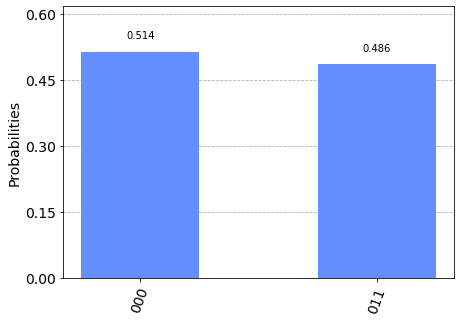

In [150]:
plot_histogram(count_sim_result.get_counts())